In [ ]:
#Installing Packages
%matplotlib inline
import numpy as np
import pandas as pd
import nltk


!pip install scikit-plot

import re
import string

import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
from mlxtend.plotting import plot_decision_regions
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Mounting Drive
!pip install kora -q
from kora import drive
drive.mount("/content/drive/")
drive.link_nbs()

     |████████████████████████████████| 57 kB 2.6 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
Mounted at /content/drive/


In [ ]:
#Loading Pre-Processed File Exist
import os
file_path_x_train = "drive/MyDrive/Colab Notebooks/amazon_reviews_pre_processed_data/X_train.csv"
file_path_y_train = "drive/MyDrive/Colab Notebooks/amazon_reviews_pre_processed_data/Y_train.csv"
if os.path.isfile(file_path_x_train) and os.path.isfile(file_path_y_train) :
  X_train = pd.read_csv(file_path_x_train).fillna(' ')
  Y_train = pd.read_csv(file_path_y_train).fillna(' ')
  X_train = X_train.loc[:, ~X_train.columns.str.contains('^Unnamed')]
  Y_train = Y_train.loc[:, ~Y_train.columns.str.contains('^Unnamed')]
  print('----------Training Data Loaded---------------------')


----------Training Data Loaded---------------------


In [ ]:
#Splitting Data into Train and Validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=0, stratify=Y_train)

**Vector Creation**

In [ ]:
#Creating Tf-Idf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tf_idf_train = vectorizer.fit_transform(X_train['title'] + '' + X_train['text'])

In [ ]:
print(f'No. of Features {len(vectorizer.get_feature_names())}')
#No. of features in word - Three million seven hundred seventy-two thousand three hundred ten

No. of Features 2887614


In [ ]:
#Creating Bag Of Words For Validation
tf_idf_val = vectorizer.transform(X_val['title'] + '' + X_val['text'])

In [ ]:
#Creating Tf-Idf For Test
tf_idf_test = vectorizer.transform(X_test['title'] + '' + X_test['text'])

In [ ]:
import joblib
#Saving Model
def save_model(model,filename):
  # save the model to disk
  joblib.dump(model, filename)
  print('Model Saved')

def get_model(filename):
  if os.path.isfile(filename):
    # load the model from disk
    print('Model Exist')
    loaded_model = joblib.load(filename)
    print('Model Loaded')
    return loaded_model
  print('Model does not exist')
  return None

**Training Models**

**1.Naive Bayes**

In [ ]:
#MultinomialNB
base_file_path = 'drive/MyDrive/Colab Notebooks/amazon_reviews_models/TF_IDF/'
# Checking If Model Exist then load it.
multinomial_nb_model_file_path = base_file_path + 'multi_nb_model.sav'
multinomial_nb_model =  get_model(multinomial_nb_model_file_path)
if multinomial_nb_model is None:
  # Build the classifier
  multinomial_nb_model = MultinomialNB()
  #  Train the classifier
  multinomial_nb_model.fit(tf_idf_train, y_train)
  save_model(multinomial_nb_model,multinomial_nb_model_file_path)

#Graph Plotting Error --Unable to allocate 98.8 TiB for an array with shape (3599999, 3772312) and data type int64

Model does not exist


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Saved


In [ ]:
#BernoulliNB
# Checking If Model Exist then load it.
bernoulli_nb_model_file_path = base_file_path + 'bernoulli_nb_model.sav'
bernoulli_nb_model =  get_model(bernoulli_nb_model_file_path)
if bernoulli_nb_model is None:
  # Build the classifier
  bernoulli_nb_model = BernoulliNB()
  #  Train the classifier
  bernoulli_nb_model.fit(tf_idf_train, y_train)
  save_model(bernoulli_nb_model,bernoulli_nb_model_file_path)

Model does not exist


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Saved


**Logistic Regression**

In [ ]:
#Logistic Regression
# Checking If Model Exist then load it.
log_reg_model_file_path = base_file_path + 'log_reg_model.sav'
log_reg_model =  get_model(log_reg_model_file_path)
if log_reg_model is None:
  log_reg_model = Pipeline([('standardscaler', StandardScaler(with_mean=False)),
                 ('logisticregression', LogisticRegression(random_state=42,solver='lbfgs', max_iter=1000))])
  log_reg_model.fit(tf_idf_train, y_train)
  save_model(log_reg_model,log_reg_model_file_path)

Model does not exist


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Saved


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Hyperparameter Tuning -- [New Addition]
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C':[0.5,0.8,1.0]
}
svm = LinearSVC()
svm_cv = GridSearchCV(svm, param_grid, cv=5)
svm_cv.fit(X_train_tf[:1000], Y_train[:1000])
print("Best Parameters of liner kernal :", svm_cv.best_params_)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters of liner kernal : {'C': 1.0}


**Linear SVM**

In [ ]:
from sklearn.svm import LinearSVC
# Checking If Model Exist then load it.
linear_svc_model_file_path = base_file_path + 'linear_svc_model.sav'
linear_svc_model =  get_model(linear_svc_model_file_path)
if linear_svc_model is None:
  linear_svc_model = Pipeline([('standardscaler', StandardScaler(with_mean=False)),
                 ('linearsvm', LinearSVC(tol=1e-5))])
  linear_svc_model.fit(tf_idf_train, y_train)
  save_model(linear_svc_model,linear_svc_model_file_path)

Model does not exist


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Model Saved


**Decision Tree Classifier**

In [ ]:
# Checking If Model Exist then load it.
decision_tree_model_file_path = base_file_path + 'decision_tree_model.sav'
decision_tree_model =  get_model(decision_tree_model_file_path)
if decision_tree_model is None:
  decision_tree_model = Pipeline([('standardscaler', StandardScaler(with_mean=False)),
                 ('decisiontreeclassifier', DecisionTreeClassifier(max_depth=10,min_samples_split=4,min_samples_leaf=300))])
  decision_tree_model.fit(tf_idf_train, y_train)
  save_model(decision_tree_model,decision_tree_model_file_path)


Model does not exist
Model Saved


In [ ]:
#hyper parameter tuning [New Addition]
#giving parameters of decision tree
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}

#calling decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)
#applying gridsearchcv for hyper parameter tuning
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
#fitting the data
tree_cv.fit(X_train_tf[:1000], Y_train[:1000])
#to print the best parameters after hyper parameter tuning
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1238 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1788 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 2438 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 3188 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 4038 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 4988 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 6038 tasks      | elapsed: 47.7min
[Parallel(n_jobs=-1)]: Done 7188 tasks      | elapsed: 54.5min
[Parallel(n_jobs=-1)]: Done 8438 tasks      | elapsed: 59.7min
[Parallel(n_jobs=-1)]: Done 9788 tasks      | elapsed: 69.1min
[Parallel(n_jobs=-1)]: Done 12996 out of 12996

Best paramters: {'criterion': 'gini', 'max_depth': 16, 'min_samples_leaf': 9, 'min_samples_split': 2, 'splitter': 'random'})


**Random Forest Classifier**

In [ ]:
# Checking If Model Exist then load it.
rf_model_file_path = base_file_path + 'rf_model.sav'
rf_model =  get_model(rf_model_file_path)
if rf_model is None:
  rf_model = Pipeline([('standardscaler', StandardScaler(with_mean=False)),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=4,min_samples_leaf=300))])
  rf_model.fit(tf_idf_train, y_train)
  save_model( rf_model, rf_model_file_path)

Model does not exist


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Model Saved


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

# Number of trees in random forest
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid with all parameters defined
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#calling random forest classifier
rand_clf = RandomForestClassifier(random_state=42)
#applying randomised search cv for hyper parameter tuning
rand_cv = RandomizedSearchCV(rand_clf, random_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
#fitting train data using randomised search cv
rand_cv.fit(X_train_tf[:1000], Y_train[:1000])
#to print best parameters after hyper parameter tuning
best_params =rand_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.5min finished
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best paramters: {'n_estimators': 311, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True})


**Performance Evaluation**

In [ ]:
def report(model,X,Y,modelName,report_type,accuracy_scores):
    YPred = model.predict(X)
    if report_type:
        print(f"{modelName} Training Data Result:\n================================================")
    else:
        print(f"{modelName} Test Data Result:\n================================================")
    model_accuracy_score = accuracy_score(Y, YPred) * 100
    print(f"Accuracy Score: {model_accuracy_score:.2f}%")
    print("_______________________________________________")
    clf_report = pd.DataFrame(classification_report(Y, YPred, output_dict=True))
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    skplt.metrics.plot_confusion_matrix(Y, YPred)
    accuracy_scores.append(model_accuracy_score)


**Training Data Performance**

Multinomial NB Model Training Data Result:
Accuracy Score: 88.52%
_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  8.754618e-01  8.954158e-01  0.885181  8.854388e-01  8.854388e-01
recall     8.981230e-01  8.722380e-01  0.885181  8.851805e-01  8.851805e-01
f1-score   8.866476e-01  8.836749e-01  0.885181  8.851613e-01  8.851613e-01
support    1.260000e+06  1.259999e+06  0.885181  2.519999e+06  2.519999e+06


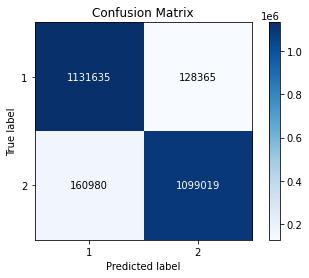

In [ ]:
training_accuracy_scores = []
report(multinomial_nb_model,tf_idf_train,y_train,'Multinomial NB Model',True,training_accuracy_scores)

Bernoulli NB Model Training Data Result:
Accuracy Score: 88.91%
_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  8.936719e-01  8.846873e-01  0.889128  8.891796e-01  8.891796e-01
recall     8.833563e-01  8.948991e-01  0.889128  8.891277e-01  8.891277e-01
f1-score   8.884842e-01  8.897639e-01  0.889128  8.891240e-01  8.891240e-01
support    1.260000e+06  1.259999e+06  0.889128  2.519999e+06  2.519999e+06


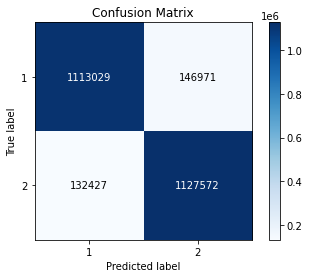

In [ ]:
report(bernoulli_nb_model,tf_idf_train,y_train,'Bernoulli NB Model',True,training_accuracy_scores)

Logistic NB Model Training Data Result:
Accuracy Score: 99.14%
_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  9.915767e-01  9.911727e-01  0.991375  9.913747e-01  9.913747e-01
recall     9.911690e-01  9.915802e-01  0.991375  9.913746e-01  9.913746e-01
f1-score   9.913728e-01  9.913764e-01  0.991375  9.913746e-01  9.913746e-01
support    1.260000e+06  1.259999e+06  0.991375  2.519999e+06  2.519999e+06


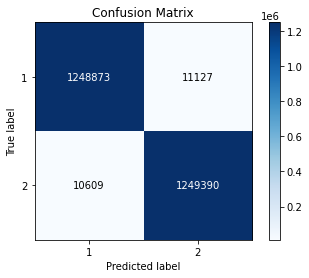

In [ ]:
report(log_reg_model,tf_idf_train,y_train,'Logistic NB Model',True,training_accuracy_scores)

Linear SVC Model Training Data Result:
Accuracy Score: 95.86%
_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  9.603022e-01  9.569433e-01  0.958617  9.586228e-01  9.586228e-01
recall     9.567857e-01  9.604476e-01  0.958617  9.586167e-01  9.586167e-01
f1-score   9.585408e-01  9.586923e-01  0.958617  9.586165e-01  9.586165e-01
support    1.260000e+06  1.259999e+06  0.958617  2.519999e+06  2.519999e+06


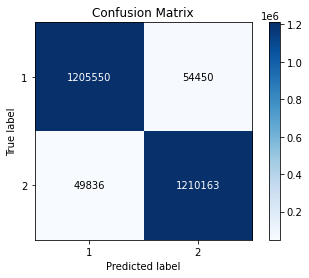

In [ ]:
report(linear_svc_model,tf_idf_train,y_train,'Linear SVC Model',True,training_accuracy_scores)

Decision Tree Model Training Data Result:
Accuracy Score: 69.77%
_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  6.601523e-01  7.581952e-01  0.697685  7.091738e-01  7.091738e-01
recall     8.148643e-01  5.805060e-01  0.697685  6.976852e-01  6.976852e-01
f1-score   7.293946e-01  6.575581e-01  0.697685  6.934763e-01  6.934763e-01
support    1.260000e+06  1.259999e+06  0.697685  2.519999e+06  2.519999e+06


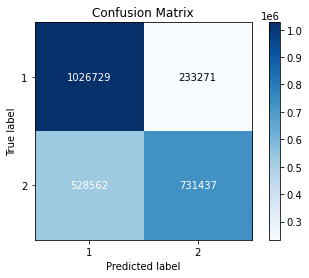

In [ ]:
report(decision_tree_model,tf_idf_train,y_train,'Decision Tree Model',True,training_accuracy_scores)

Random Forest Model Training Data Result:
Accuracy Score: 74.05%
_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  7.884140e-01  7.062750e-01  0.740525  7.473445e-01  7.473445e-01
recall     6.575048e-01  8.235459e-01  0.740525  7.405253e-01  7.405253e-01
f1-score   7.170333e-01  7.604157e-01  0.740525  7.387245e-01  7.387245e-01
support    1.260000e+06  1.259999e+06  0.740525  2.519999e+06  2.519999e+06


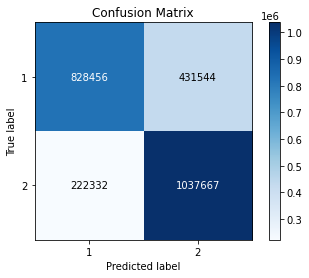

In [ ]:
report(rf_model,tf_idf_train,y_train,'Random Forest Model',True,training_accuracy_scores)

**Validation Data Performance**

Multinomial NB Model Test Data Result:
Accuracy Score: 84.34%
_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy     macro avg  weighted avg
precision       0.833062       0.854440  0.843419  8.437509e-01  8.437509e-01
recall          0.858967       0.827870  0.843419  8.434185e-01  8.434185e-01
f1-score        0.845816       0.840946  0.843419  8.433807e-01  8.433807e-01
support    540000.000000  540000.000000  0.843419  1.080000e+06  1.080000e+06


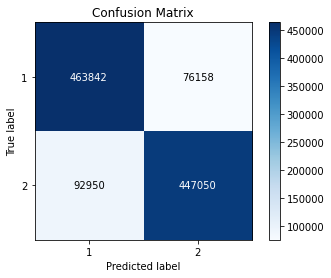

In [ ]:
validation_accuracy_scores = []
report(multinomial_nb_model,tf_idf_val,y_val,'Multinomial NB Model',False,validation_accuracy_scores)

Bernoulli NB Model Test Data Result:
Accuracy Score: 84.97%
_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy     macro avg  weighted avg
precision       0.857439       0.842361  0.849738  8.499004e-01  8.499004e-01
recall          0.838965       0.860511  0.849738  8.497380e-01  8.497380e-01
f1-score        0.848102       0.851340  0.849738  8.497205e-01  8.497205e-01
support    540000.000000  540000.000000  0.849738  1.080000e+06  1.080000e+06


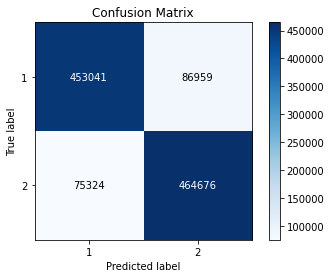

In [ ]:
report(bernoulli_nb_model,tf_idf_val,y_val,'Bernoulli NB Model',False,validation_accuracy_scores)

Logistic NB Model Test Data Result:
Accuracy Score: 78.27%
_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy     macro avg  weighted avg
precision       0.777215       0.788315  0.782656  7.827654e-01  7.827654e-01
recall          0.792470       0.772843  0.782656  7.826565e-01  7.826565e-01
f1-score        0.784769       0.780502  0.782656  7.826355e-01  7.826355e-01
support    540000.000000  540000.000000  0.782656  1.080000e+06  1.080000e+06


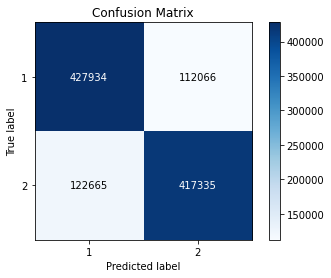

In [ ]:
report(log_reg_model,tf_idf_val,y_val,'Logistic NB Model',False,validation_accuracy_scores)

Linear SVC Model Test Data Result:
Accuracy Score: 77.92%
_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy     macro avg  weighted avg
precision       0.775242       0.783304  0.779215  7.792730e-01  7.792730e-01
recall          0.786431       0.771998  0.779215  7.792148e-01  7.792148e-01
f1-score        0.780797       0.777610  0.779215  7.792033e-01  7.792033e-01
support    540000.000000  540000.000000  0.779215  1.080000e+06  1.080000e+06


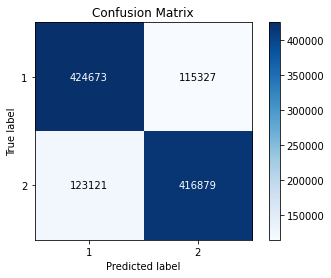

In [ ]:
report(linear_svc_model,tf_idf_val,y_val,'Linear SVC Model',False,validation_accuracy_scores)

Decision Tree Model Training Data Result:
Accuracy Score: 69.76%
_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy     macro avg  weighted avg
precision       0.661432       0.754771  0.697635  7.081014e-01  7.081014e-01
recall          0.809767       0.585504  0.697635  6.976352e-01  6.976352e-01
f1-score        0.728121       0.659449  0.697635  6.937850e-01  6.937850e-01
support    540000.000000  540000.000000  0.697635  1.080000e+06  1.080000e+06


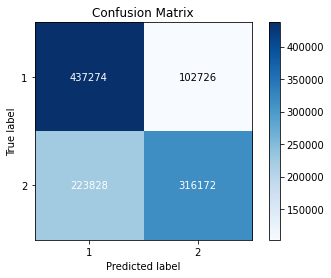

In [ ]:
report(decision_tree_model,tf_idf_val,y_val,'Decision Tree Model',True,validation_accuracy_scores)

Random Forest Model Training Data Result:
Accuracy Score: 73.98%
_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy     macro avg  weighted avg
precision       0.786816       0.706014  0.739791  7.464147e-01  7.464147e-01
recall          0.657813       0.821769  0.739791  7.397907e-01  7.397907e-01
f1-score        0.716555       0.759506  0.739791  7.380302e-01  7.380302e-01
support    540000.000000  540000.000000  0.739791  1.080000e+06  1.080000e+06


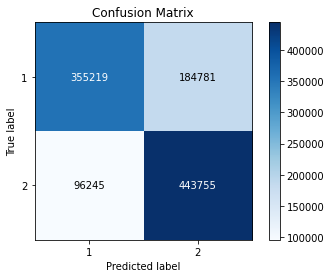

In [ ]:
report(rf_model,tf_idf_val,y_val,'Random Forest Model',True,validation_accuracy_scores)

In [ ]:
def create_barplot(df,x_label,y_label,x_col,y_col,filename):
    plt.figure(figsize=(12,6),dpi=100)
    plt.style.use('ggplot')
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x=x_col,y=y_col,data=df,palette="Set2")

    for bar in ax.patches:
      ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

    ax.set(xlabel=x_label, ylabel=y_label)
    ax.tick_params(axis='x', rotation=30)
    plt.setp(ax.patches, linewidth=0)
    # plt.legend(title = 'Team Name', bbox_to_anchor=(1, 1))
    file_path = f'drive/MyDrive/Colab Notebooks/amazon_reviews_model_results/{filename}.png'
    plt.savefig(file_path,bbox_inches = 'tight')
    plt.show()



In [ ]:
print(f'Training Accuracy Score -- {training_accuracy_scores}')
print(f'Validation Accuracy Score -- {validation_accuracy_scores}')

Training Accuracy Score -- [88.51805099922659, 88.91277337808468, 99.13745997518252, 95.86166502447024, 69.76851974941259, 74.05252938592436]
Validation Accuracy Score -- [84.34185185185186, 84.9737962962963, 78.26564814814814, 77.92148148148148, 69.76351851851852, 73.97907407407406]


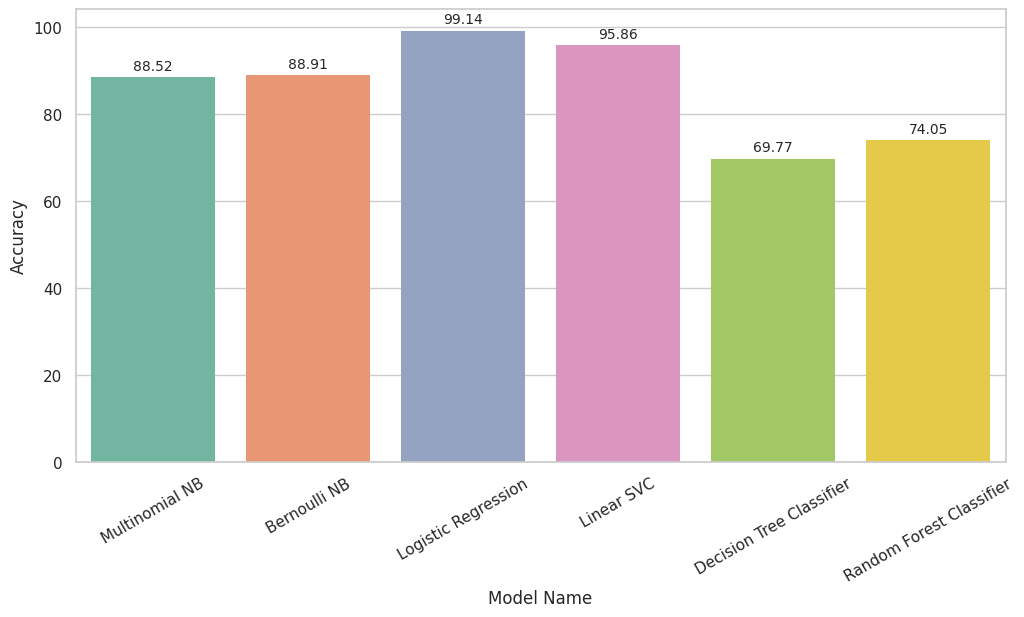

In [ ]:
training_accuracy_scores = [88.51805099922659, 88.91277337808468, 99.13745997518252, 95.86166502447024, 69.76851974941259, 74.05252938592436]
validation_accuracy_scores = [84.34185185185186, 84.9737962962963, 78.26564814814814, 77.92148148148148, 69.76351851851852, 73.97907407407406]
model_name_list = ['Multinomial NB','Bernoulli NB','Logistic Regression','Linear SVC','Decision Tree Classifier','Random Forest Classifier']
df_train = pd.DataFrame(model_name_list,columns=['model_name'])
df_train['accuracy_score'] = training_accuracy_scores
df_val = pd.DataFrame(model_name_list,columns=['model_name'])
df_val['accuracy_score'] = validation_accuracy_scores
create_barplot(df_train,'Model Name','Accuracy','model_name','accuracy_score','tf_idf_train_accuracy')

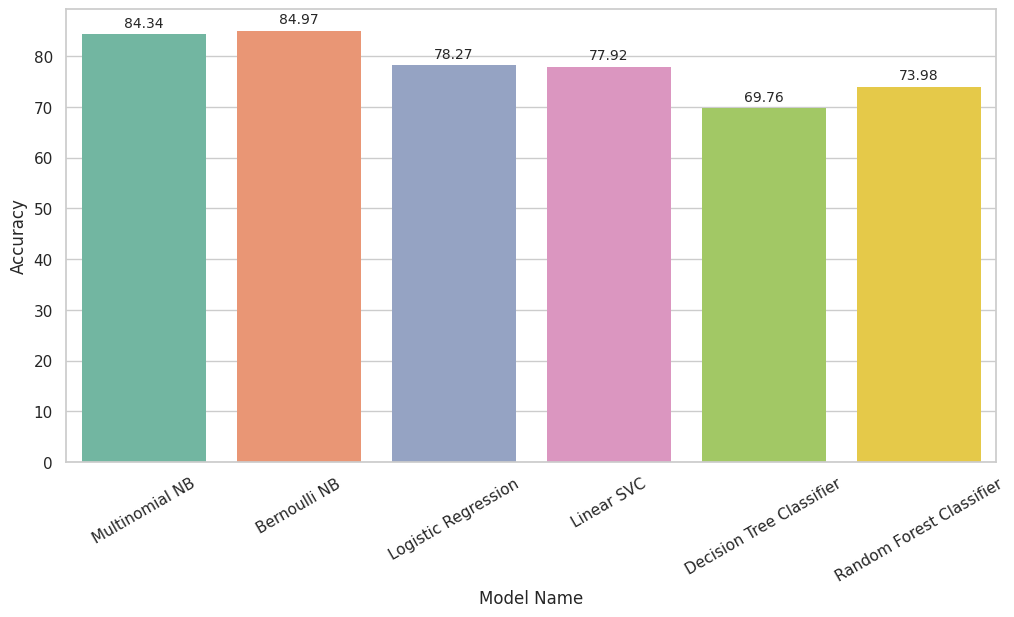

In [ ]:
create_barplot(df_val,'Model Name','Accuracy','model_name','accuracy_score','tf_idf_val_accuracy')

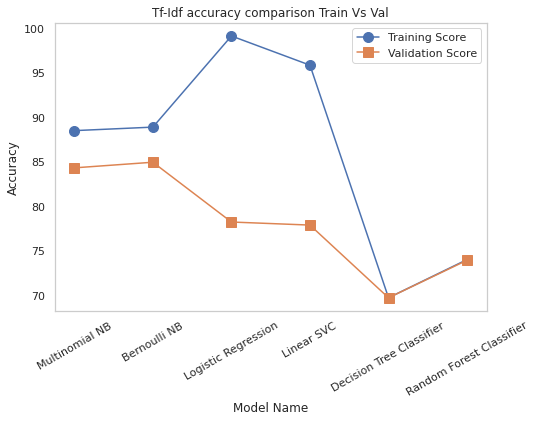

In [ ]:
#Creating Canvas
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Accuracy')
ax.set_xlabel('Model Name')
ax.set_title('Tf-Idf accuracy comparison Train Vs Val')

#Creating Multiline Plot
ax.plot(model_name_list,training_accuracy_scores, label="Training Score",marker='o',ms=10)
ax.plot(model_name_list,validation_accuracy_scores, label="Validation Score",marker='s',ms=10)

for bar in ax.patches:
      ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
ax.grid(False)
ax.set_facecolor('white')
ax.legend()
ax.tick_params(axis='x', rotation=30)
file_path = f'drive/MyDrive/Colab Notebooks/amazon_reviews_model_results/tf_idf_accuracy_comp.png'
plt.savefig(file_path,bbox_inches = 'tight')
plt.show()
plt.close()

**Best Model is Bernoulli NB based on Validation Accuracy**